# Assignment 1 - Data Visualization

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Set max columns and rows for pandas dataframe
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

# Set figure sizes
plt.rcParams["figure.figsize"] = (15, 15)

In [2]:
# We have used pandas to import the data set.
data = pd.read_csv('LoanStats3a.csv', header=0, low_memory=False)
data.shape

(39786, 151)

In [3]:
# lets see sample rows and columns : 
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Dec-18,749,745,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,499,0,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400,2400,2400.0,36 mon

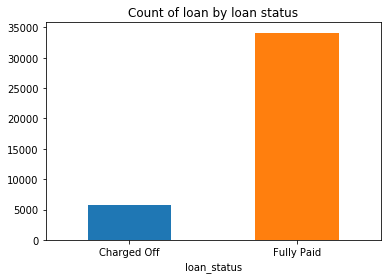

In [4]:
# to find the number of good vs bad loans using loan status
df=data.groupby(['loan_status'])['loan_amnt'].count()
df.plot.bar(title='Count of loan by loan status',rot=0)
plt.show()

In [5]:
# to filter the loan status as good or bad and skip loan that do not meet credit policies 
credit_policies = {
    'Fully Paid': 'good',
    'Current': 'skip',
    'Default': 'bad',
    'Charged Off': 'bad',
    'In Grace Period': 'skip',
    'Late (16-30 days)': 'skip',
    'Late (31-120 days)': 'skip',
    'Does not meet the credit policy. Status:Fully Paid':'skip',
    'Does not meet the credit policy. Status:Charged Off':'skip'
}
data['loan_status']=data['loan_status'].map(lambda value : credit_policies[value])
data=data[data['loan_status']!='skip']

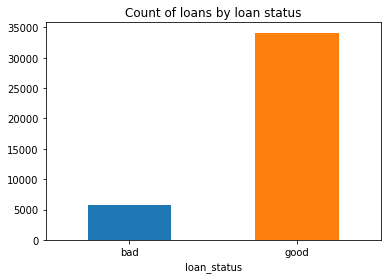

In [6]:
df=data.groupby(['loan_status'])['loan_amnt'].count()
df.plot.bar(title='Count of loans by loan status',rot=0)
plt.show()

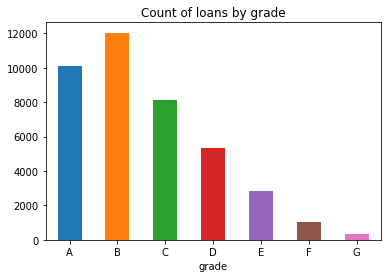

In [7]:
df=data.groupby(['grade'])['loan_amnt'].count()
df.plot.bar(title='Count of loans by grade',rot=0)
plt.show()

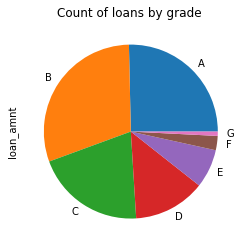

In [8]:
df=data.groupby(['grade'])['loan_amnt'].count()
df.plot.pie(title='Count of loans by grade ', rot=0)
plt.show()

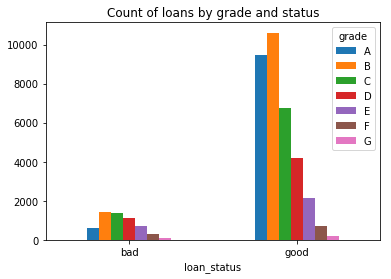

In [9]:
df=data.groupby(['grade','loan_status'])['loan_amnt'].count()
df.unstack(level=0).plot.bar(title='Count of loans by grade and status',rot=0)
plt.show()

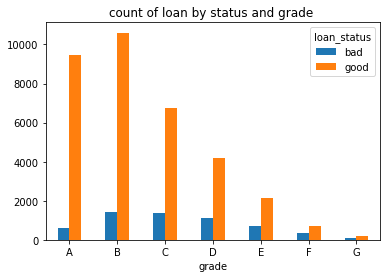

In [10]:
df=data.groupby(['loan_status','grade'])['loan_amnt'].count()
df.unstack(level=0).plot.bar(title='count of loan by status and grade ', rot=0)
plt.show()

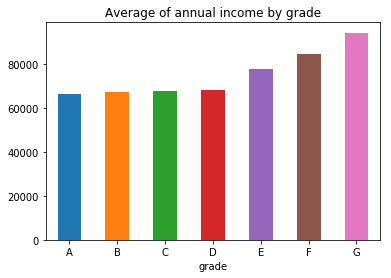

In [11]:
df=data.groupby(['grade'])['annual_inc'].mean()
df.plot.bar(title='Average of annual income by grade', rot=0)
plt.show()

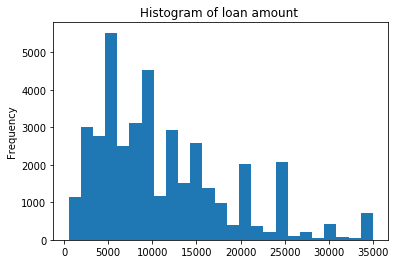

In [12]:
df=data['loan_amnt']
df.plot.hist(title='Histogram of loan amount ',rot=0,bins=25)
plt.show()

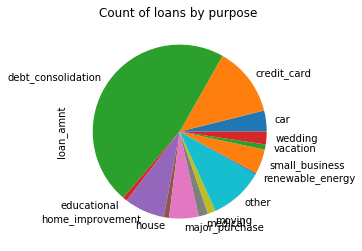

In [13]:
df=data.groupby(['purpose'])['loan_amnt'].count()
df.plot.pie(title='Count of loans by purpose ', rot=0)
plt.show()
